In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import pandas as pd

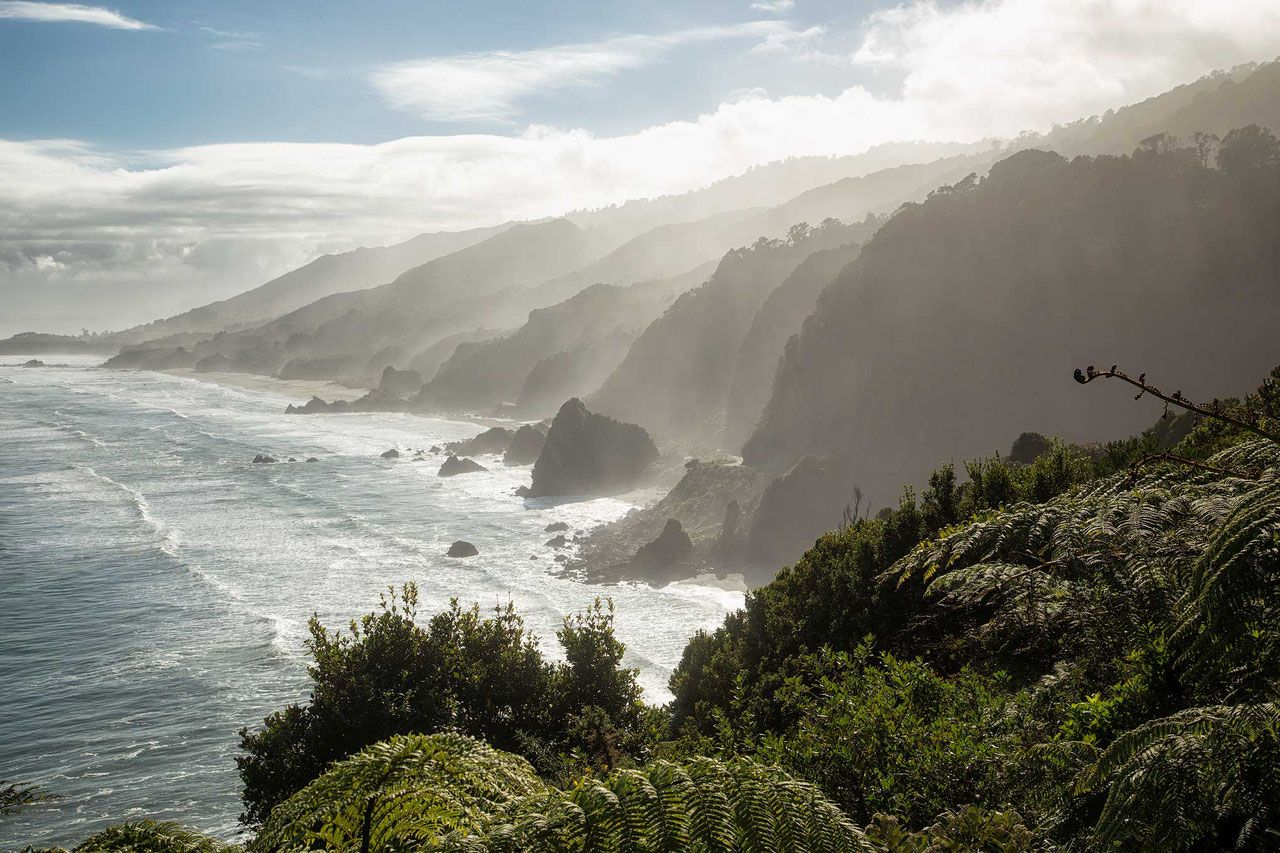

In [10]:
coast = cv2.imread("images/nzcoast.jpg",1)
coast_rgb = cv2.cvtColor(coast, cv2.COLOR_BGR2RGB)
Image('images/nzcoast.jpg')

Text(0.5, 1.0, 'Brighter')

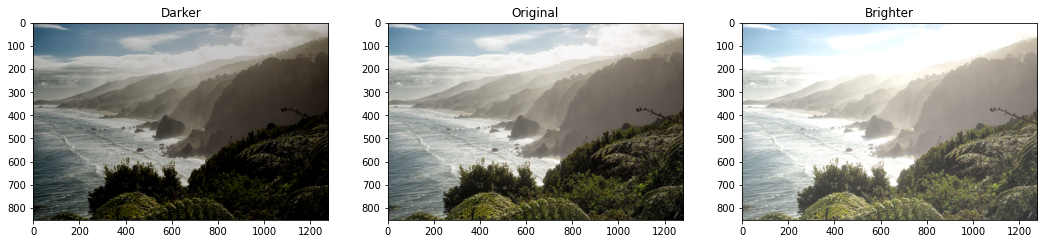

In [11]:
# Adjusting the brightness of the image / Addition
matrix = np.ones(coast_rgb.shape, dtype="uint8") * 50

darker_coast = cv2.subtract(coast_rgb, matrix)
brighter_coast = cv2.add(coast_rgb, matrix)

plt.figure(figsize=(18,5))
plt.subplot(131); plt.imshow(darker_coast); plt.title("Darker")
plt.subplot(132); plt.imshow(coast_rgb); plt.title("Original")
plt.subplot(133); plt.imshow(brighter_coast); plt.title("Brighter")

Text(0.5, 1.0, 'Higher Contrast')

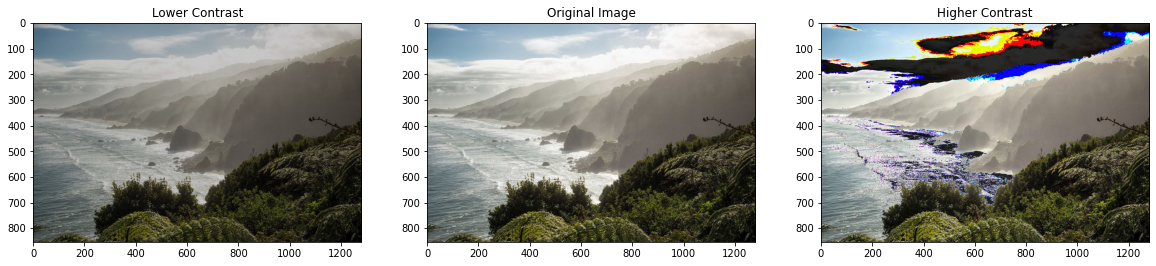

In [12]:
# Adjusting the contrast of the image / Multiplication
matrix1 = np.ones(coast_rgb.shape) * 0.8
matrix2 = np.ones(coast_rgb.shape) * 1.2

lower_contrast = np.uint8(cv2.multiply(np.float64(coast_rgb), matrix1))
higher_contrast = np.uint8(cv2.multiply(np.float64(coast_rgb), matrix2))

plt.figure(figsize=(20,10))
plt.subplot(131); plt.imshow(lower_contrast); plt.title("Lower Contrast")
plt.subplot(132); plt.imshow(coast_rgb); plt.title("Original Image")
plt.subplot(133); plt.imshow(higher_contrast); plt.title("Higher Contrast")

Text(0.5, 1.0, 'Higher Contrast')

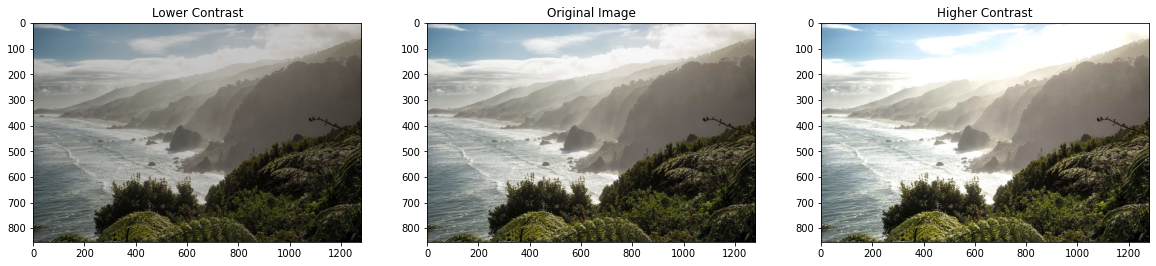

In [13]:
# Handling overflow while adjusting the contrast
lower_contrast = np.uint8(cv2.multiply(np.float64(coast_rgb), matrix1))
higher_contrast_correction = np.uint8(np.clip(cv2.multiply(np.float64(coast_rgb), matrix2), 0, 255))
                          
plt.figure(figsize=(20,10))
plt.subplot(131); plt.imshow(lower_contrast); plt.title("Lower Contrast")
plt.subplot(132); plt.imshow(coast_rgb); plt.title("Original Image")
plt.subplot(133); plt.imshow(higher_contrast_correction); plt.title("Higher Contrast")

(1696, 2447)


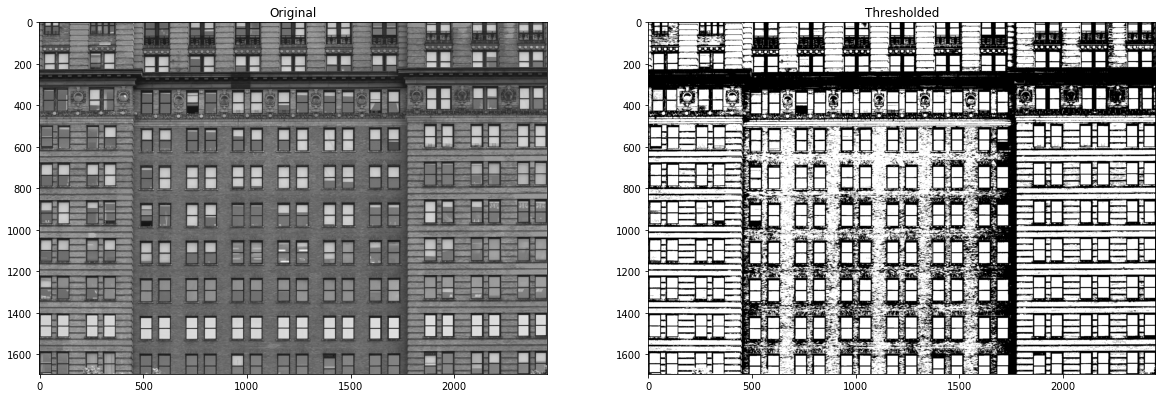

In [15]:
# Image Thresholding
windows = cv2.imread("images/windows.jpg", 0)
retval, windows_thresh = cv2.threshold(windows, thresh=100, maxval=255, type=cv2.THRESH_BINARY)

plt.figure(figsize=(20,15))
plt.subplot(121); plt.imshow(windows, cmap="gray"); plt.title("Original")
plt.subplot(122); plt.imshow(windows_thresh, cmap="gray"); plt.title("Thresholded")

print(windows_thresh.shape)

Text(0.5, 1.0, 'Original')

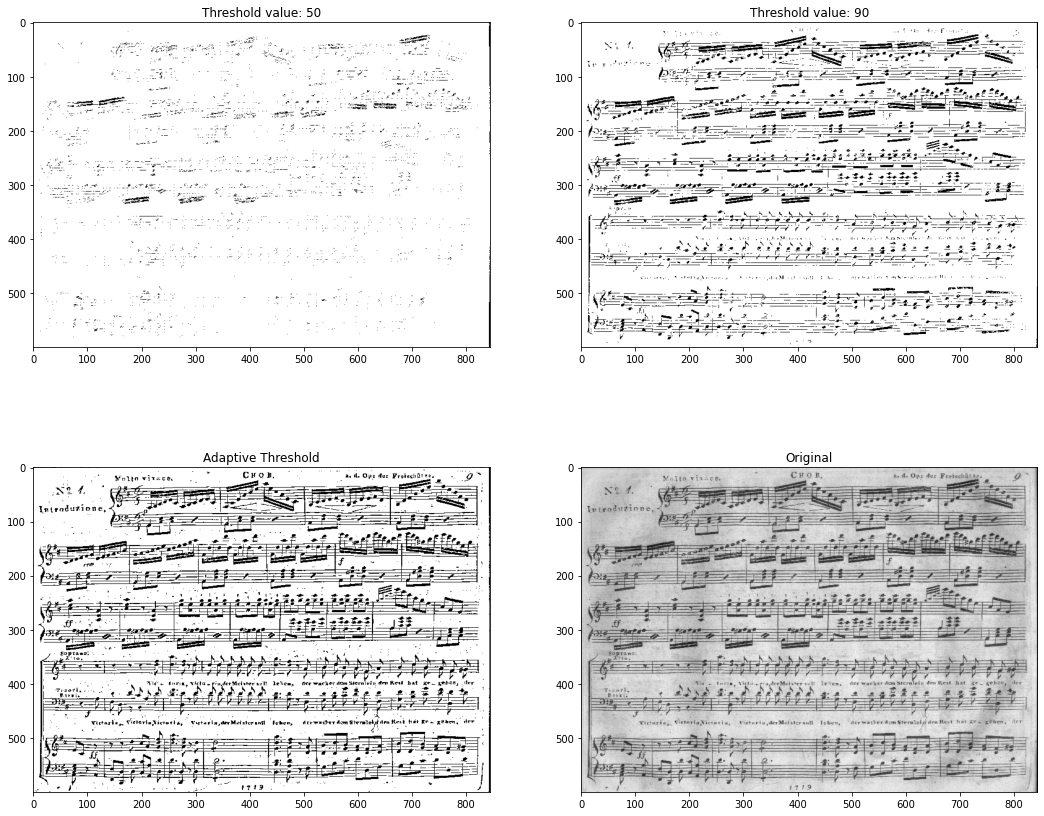

In [16]:
# Using adaptive thresholding methods

sheet = cv2.imread("images/musicsheet.jpeg", 0)

# Global thresholding with threshold value 50
retval, sheet_thresh_1 = cv2.threshold(sheet, 50, 255, type=cv2.THRESH_BINARY)

# Global thresholding with threshold value 90
retval, sheet_thresh_2 = cv2.threshold(sheet, 90, 255, type=cv2.THRESH_BINARY)

# Adaptive thresholding
sheet_thresh_adp = cv2.adaptiveThreshold(sheet, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 20)

plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(sheet_thresh_1, cmap="gray"); plt.title("Threshold value: 50")
plt.subplot(222); plt.imshow(sheet_thresh_2, cmap="gray"); plt.title("Threshold value: 90")
plt.subplot(223); plt.imshow(sheet_thresh_adp, cmap="gray"); plt.title("Adaptive Threshold")
plt.subplot(224); plt.imshow(sheet, cmap="gray"); plt.title("Original")

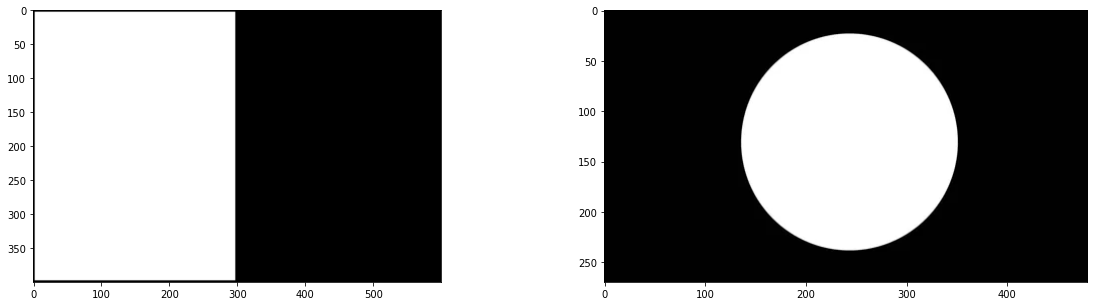

In [17]:
# Bitwise operations

# Bitwise AND
rectangle = cv2.imread("images/rectangle.png", 0)
circle = cv2.imread("images/circle.png", 0)

plt.figure(figsize=[20,5])
plt.subplot(121); plt.imshow(rectangle, cmap='gray');
plt.subplot(122); plt.imshow(circle, cmap='gray');

In [18]:
result_and = cv2.bitwise_and(rectangle, circle, mask=None)
plt.imshow(result_and, cmap="gray")

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:214: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'cv::binary_op'


(480, 270)
(270, 480)


True

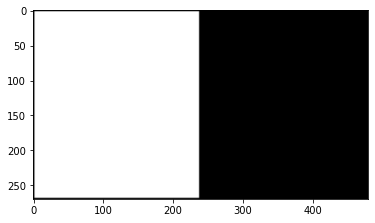

In [19]:
# Resizing image to avoid the error

width_circle = circle.shape[1]
height_circle = circle.shape[0]
dim = (width_circle, height_circle)
print(dim)

resized_rectangle = cv2.resize(rectangle, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_rectangle, cmap='gray')
print(resized_rectangle.shape)
cv2.imwrite('images/resized-rectangle.png', resized_rectangle)

Text(0.5, 1.0, 'Bitwise AND')

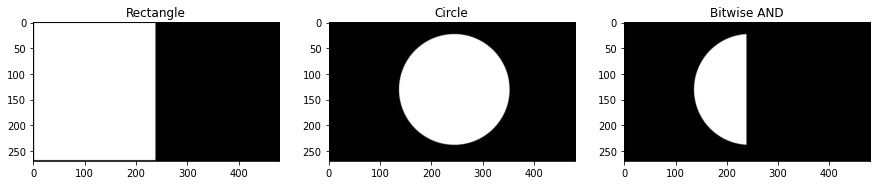

In [20]:
# Bitwise AND

rectangle = cv2.imread('images/resized-rectangle.png', 0)
result_and = cv2.bitwise_and(rectangle, circle, mask=None)

plt.figure(figsize=[15,8])
plt.subplot(131); plt.imshow(rectangle, cmap="gray"); plt.title('Rectangle')
plt.subplot(132); plt.imshow(circle, cmap="gray"); plt.title('Circle')
plt.subplot(133); plt.imshow(result_and, cmap="gray"); plt.title('Bitwise AND')

Text(0.5, 1.0, 'Bitwise OR')

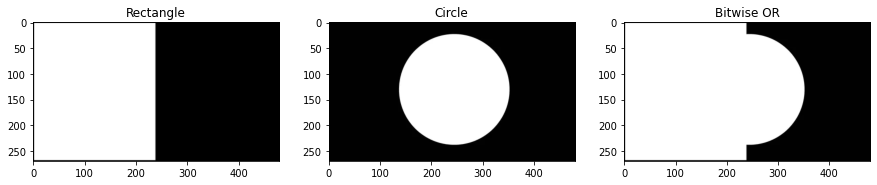

In [21]:
# Bitwise OR

result_or = cv2.bitwise_or(rectangle, circle, mask=None)

plt.figure(figsize=[15,8])
plt.subplot(131); plt.imshow(rectangle, cmap="gray"); plt.title('Rectangle')
plt.subplot(132); plt.imshow(circle, cmap="gray"); plt.title('Circle')
plt.subplot(133); plt.imshow(result_or, cmap="gray"); plt.title('Bitwise OR')

Text(0.5, 1.0, 'Bitwise XOR')

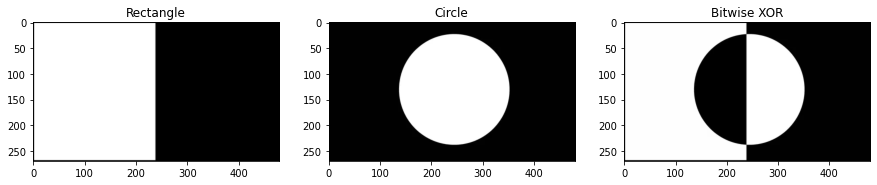

In [22]:
# Bitwise XOR / (Prints white only if either of them are white)

result_xor = cv2.bitwise_xor(rectangle, circle, mask=None)

plt.figure(figsize=[15,8])
plt.subplot(131); plt.imshow(rectangle, cmap="gray"); plt.title('Rectangle')
plt.subplot(132); plt.imshow(circle, cmap="gray"); plt.title('Circle')
plt.subplot(133); plt.imshow(result_xor, cmap="gray"); plt.title('Bitwise XOR')

In [23]:
# Application of image enhancement

# Resizing the images to the same size
coke = cv2.imread('images/cocacola.png', cv2.IMREAD_COLOR)
color = cv2.imread('images/colornew.jpg', cv2.IMREAD_COLOR)

des_width = coke.shape[0]
des_height = coke.shape[1]

aspect_ratio = des_width / color.shape[1]
color_height = int(color.shape[0] * aspect_ratio)
dim = (des_width, color_height)

resized_color = cv2.resize(color, dsize=dim, interpolation=cv2.INTER_AREA)
cv2.imwrite('images/resized_color.jpg', resized_color)
print(coke.shape)
print(resized_color.shape)

(300, 300, 3)
(300, 300, 3)


In [24]:
color = cv2.cvtColor(resized_color, cv2.COLOR_BGR2RGB)
coke = cv2.cvtColor(coke, cv2.COLOR_BGR2RGB)

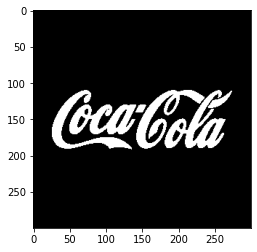

In [25]:
# Creating masks

coke_gray = cv2.cvtColor(coke, cv2.COLOR_RGB2GRAY)
retval, coke_mask = cv2.threshold(coke_gray, thresh=100, maxval=255, type=cv2.THRESH_BINARY)
plt.imshow(coke_mask, cmap="gray")

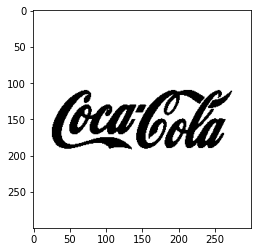

In [26]:
coke_mask_inverse = cv2.bitwise_not(coke_mask, mask=None)
plt.imshow(coke_mask_inverse, cmap="gray")

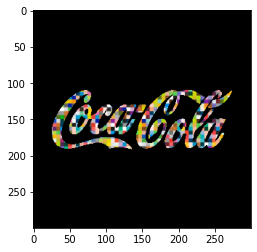

In [27]:
# Applying the background to the mask

image_1 = cv2.bitwise_and(color, color, mask=coke_mask)
plt.imshow(image_1)

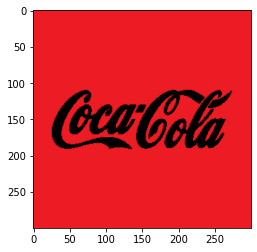

In [28]:
# Removing the text part from the logo

image_2 = cv2.bitwise_and(coke, coke, mask=coke_mask_inverse)
plt.imshow(image_2)

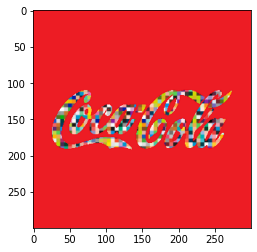

In [29]:
final_image = cv2.add(image_1, image_2)
plt.imshow(final_image)

In [30]:
output_image = cv2.cvtColor(final_image, cv2.COLOR_RGB2BGR)
cv2.imwrite('images/coke-edited.jpg', output_image)

True

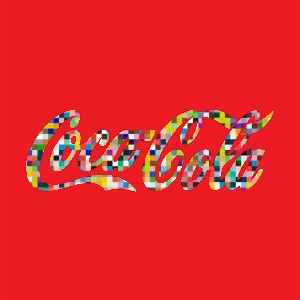

In [31]:
Image('images/coke-edited.jpg')